In [1]:
# Importing the basic libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset throught pandas

df=pd.read_csv("Amazon Sale Report.csv")
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [19]:
# Display dataset overview
print("Dataset Shape:", df.shape)
print("Column Names:", df.columns)
print("\nNull Values:\n", df.isnull().sum())
print("\nData Types:\n", df.dtypes)

Dataset Shape: (128976, 21)
Column Names: Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by', 'New', 'PendingS'],
      dtype='object')

Null Values:
 index                      0
Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                7800
Amount                  7800
ship-city                 35
ship-state                35
ship-postal-code          35
ship-country              35
B2B                        0
fulfilled-by           89713
New                   128976
PendingS              128976
dtype: int64

Data 


Sales Overview


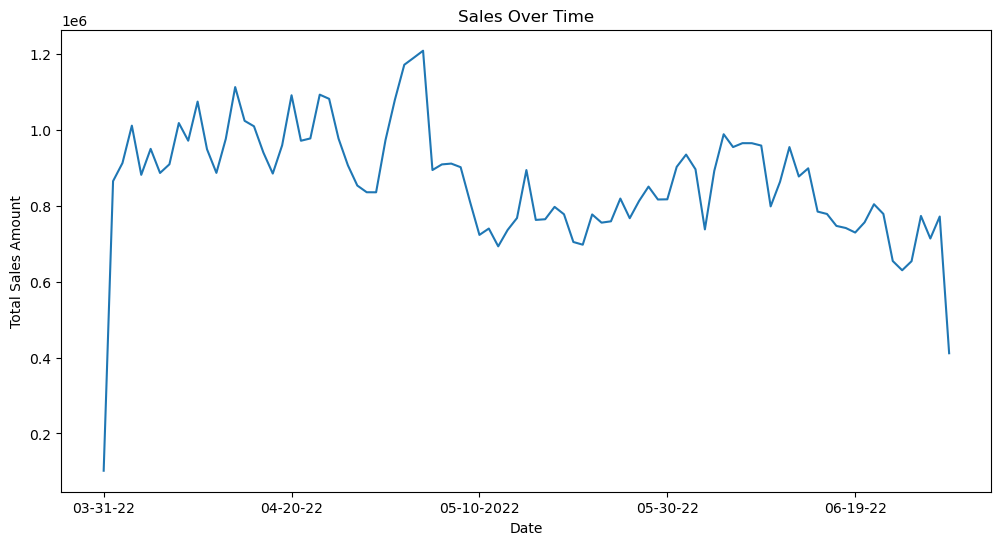

In [22]:
# Sales Overview
print("\nSales Overview")
sales_by_date = df.groupby('Date')['Amount'].sum()
plt.figure(figsize=(12, 6))
sales_by_date.plot(kind='line', title='Sales Over Time')
plt.ylabel('Total Sales Amount')
plt.show()


Product Analysis
Top Product Categories by Sales:
 Category
T-shirt     39206756.65
Shirt       21297770.08
Blazzer     11215104.12
Trousers     5346286.30
Perfume       789419.66
Name: Amount, dtype: float64


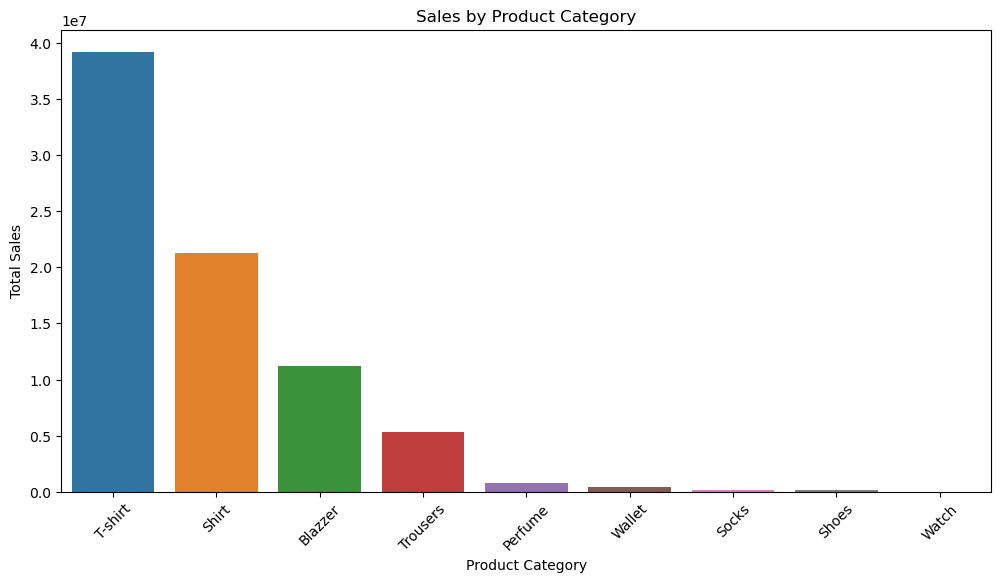

In [24]:
# Product Analysis
print("\nProduct Analysis")
category_sales = df.groupby('Category')['Amount'].sum().sort_values(ascending=False)
print("Top Product Categories by Sales:\n", category_sales.head())

plt.figure(figsize=(12, 6))
sns.barplot(x=category_sales.index, y=category_sales.values)
plt.title('Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()



Fulfillment Analysis
Fulfillment Method Counts:
 Amazon      89713
Merchant    39263
Name: Fulfilment, dtype: int64


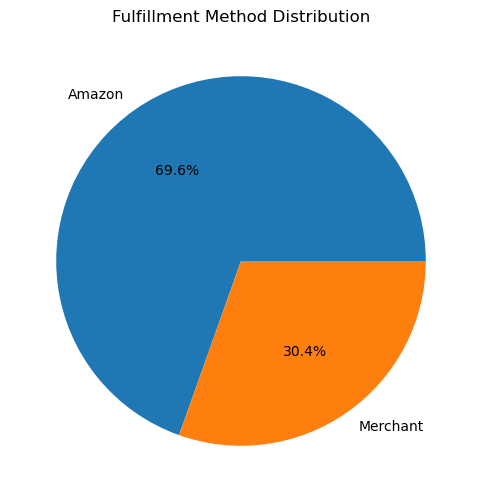

In [31]:
# Fulfillment Analysis
print("\nFulfillment Analysis")
fulfillment_counts = df['Fulfilment'].value_counts()
print("Fulfillment Method Counts:\n", fulfillment_counts)

plt.figure(figsize=(8, 6))
fulfillment_counts.plot(kind='pie', autopct='%1.1f%%', title='Fulfillment Method Distribution')
plt.ylabel('')
plt.show()


Customer Segmentation
Top Customers:
 Order ID
408-3363121-6123562    8636.0
405-8750647-4224357    8081.0
403-4288285-8521928    6993.0
404-9932919-6662730    6832.0
408-3317403-1729937    6680.0
Name: Amount, dtype: float64


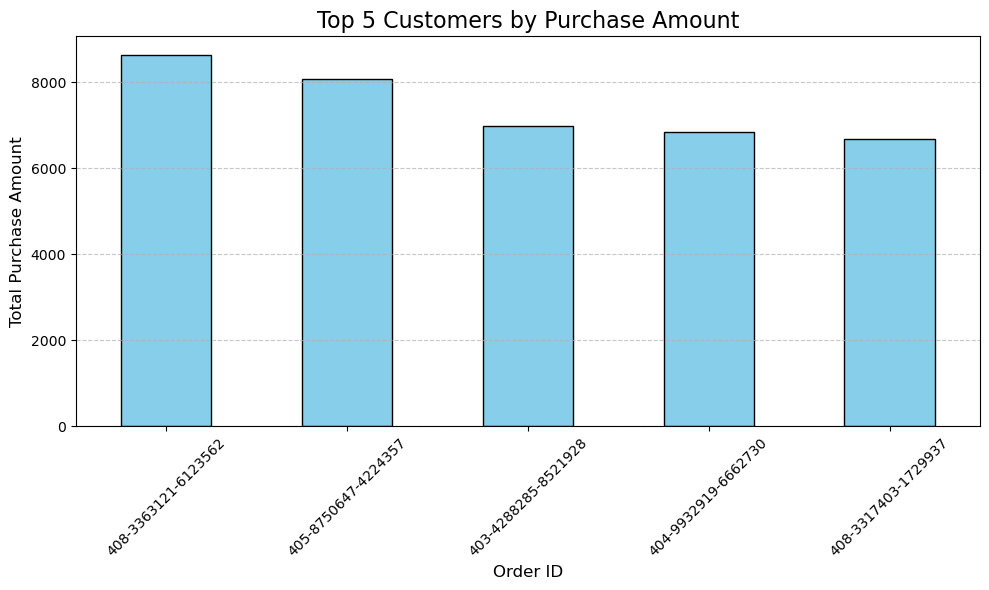

In [37]:
# Customer Segmentation
print("\nCustomer Segmentation")
customer_purchases = df.groupby('Order ID')['Amount'].sum()
top_customers = customer_purchases.sort_values(ascending=False).head()
print("Top Customers:\n", top_customers)

plt.figure(figsize=(10, 6))
top_customers.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding titles and labels
plt.title('Top 5 Customers by Purchase Amount', fontsize=16)
plt.xlabel('Order ID', fontsize=12)
plt.ylabel('Total Purchase Amount', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


Geographical Analysis
Sales by State:



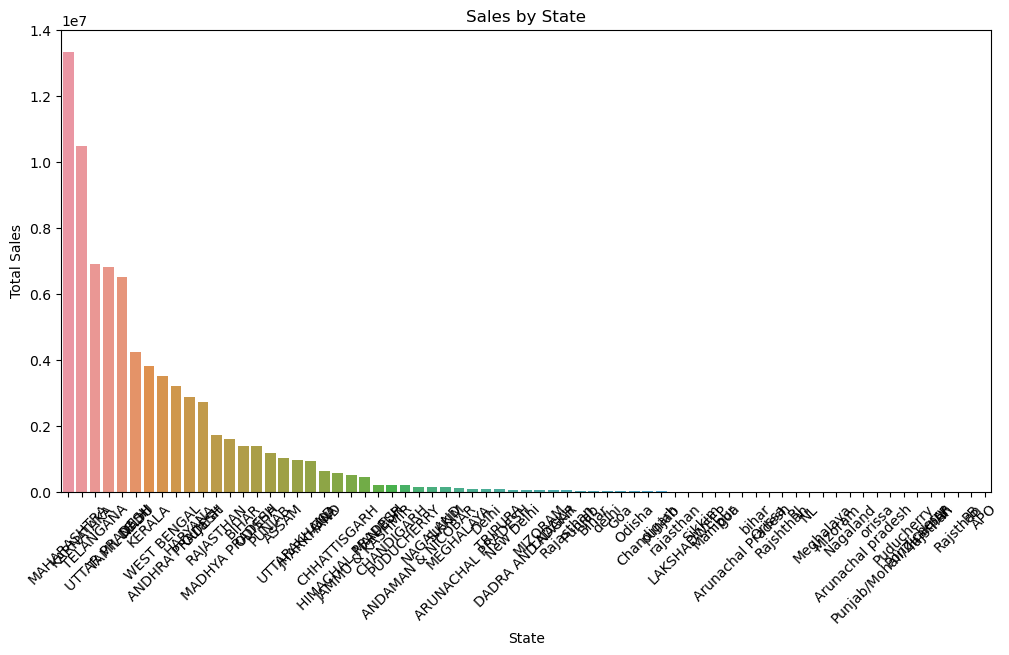

In [50]:
# Geographical Analysis
print("\nGeographical Analysis")
state_sales = df.groupby('ship-state')['Amount'].sum().sort_values(ascending=False)
print("Sales by State:\n"), #state_sales.head())

plt.figure(figsize=(12,6))
sns.barplot(x=state_sales.index, y=state_sales.values)
plt.title('Sales by State')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()